# neural net yayy

### importing should be done at the start


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [203]:

def sigmoid(a):
    return (1/(1+np.exp(-1*a)))

def dersig(a):
    return np.exp(-a)/((1+np.exp(-a))**2)

class Ann(object):
    def __init__(self):
        
        self.a1_size=2
        self.hidden_size=3
        self.h_size=1
        
        self.theta1=np.random.rand(self.a1_size,self.hidden_size)
        self.theta2=np.random.rand(self.hidden_size,self.h_size)


    def fwd(self,X):
        self.z2 = np.dot(X , self.theta1)
        self.hidden = sigmoid(self.z2)
        
        self.z3=np.dot(self.hidden,self.theta2)
        self.h= sigmoid(self.z3)
        
        return self.h
    
    def J(self,X,y):
        return sum((y-self.fwd(X))**2)*0.5
    
        
    def dJdt(self,X,y):
        self.h=self.fwd(X)
        
        delta3 = np.multiply(-(y-self.h),dersig(self.z3))
        self.dJdT2=np.dot(self.hidden.T , delta3)
        
        delta2=np.dot(delta3,self.theta2.T)*dersig(self.z2)
        self.dJdT1 = X.T.dot(delta2)
        
        return self.dJdT1 , self.dJdT2
    
    def batchGradd(self,X,y,alpha,t):
        self.jhistory=[]
        self.thistory=[]
        for i in range (0,t):
            djdt1 , djdt2 = self.dJdt(X,y)
            self.theta1=self.theta1-alpha*djdt1
            self.theta2=self.theta2-alpha*djdt2
            self.thistory.append(t)
            self.jhistory.append(self.J(X,y))
            
        plt.plot(self.thistory,self.jhistory)
        plt.legend('cost')
            

In [204]:
x=np.array([[1,2],[3,4],[5,6],[7,8]])
print("x is \n",x)

y=np.array([3,7,11,15]).reshape(4,1)
print("\n and y is \n",y)

x is 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]

 and y is 
 [[ 3]
 [ 7]
 [11]
 [15]]


initially our weihts w1 and w2 are
 [[ 0.70514886  0.00771293  0.02177061]
 [ 0.00659925  0.48586097  0.57028156]] 

 [[ 0.00888099]
 [ 0.35913531]
 [ 0.05191903]]
initially our predictions are
 [[ 0.57605754]
 [ 0.59155097]
 [ 0.59878729]
 [ 0.60170362]]
initially cost function is 
 [ 181.21994018] 

initially our gradients are

[[-0.00944863 -0.59539799 -0.05377875]
 [-0.01269996 -0.76291805 -0.07092925]] 

[[-7.64096224]
 [-7.54850703]
 [-7.71176363]]
finally our weihts w1 and w2 are
 [[ 0.79963517  5.96169282  0.55955809]
 [ 0.13359885  8.11504145  1.2795741 ]] 

 [[ 76.4185034 ]
 [ 75.8442056 ]
 [ 77.16955535]]
finally our predictions are
 [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
finally cost function is 
 [ 168.] 

finally our gradients are

[[ -5.47403831e-89  -6.56820291e-98  -1.17684605e-89]
 [ -1.09480766e-88  -1.31364058e-97  -2.35369209e-89]] 

[[ -2.79807544e-90]
 [ -3.76088363e-90]
 [ -3.60163955e-90]]


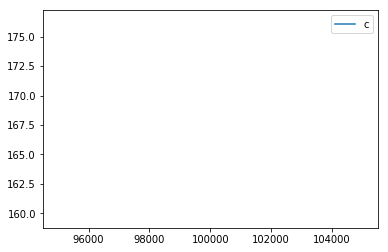

In [205]:
ann1 = Ann()

h=ann1.fwd(x)

print("initially our weihts w1 and w2 are\n",ann1.theta1, '\n\n' ,ann1.theta2)

print("initially our predictions are\n",h)

print('initially cost function is \n',ann1.J(x,y),'\n')

dJdT1 , dJdT2 = ann1.dJdt(x,y)
print("initially our gradients are\n")
print(dJdT1,"\n")
print(dJdT2)

ann1.batchGradd(x,y,10,100000)

h=ann1.fwd(x)

print("finally our weihts w1 and w2 are\n",ann1.theta1, '\n\n' ,ann1.theta2)

print("finally our predictions are\n",h)

print('finally cost function is \n',ann1.J(x,y),'\n')

dJdT1 , dJdT2 = ann1.dJdt(x,y)
print("finally our gradients are\n")
print(dJdT1,"\n")
print(dJdT2)


